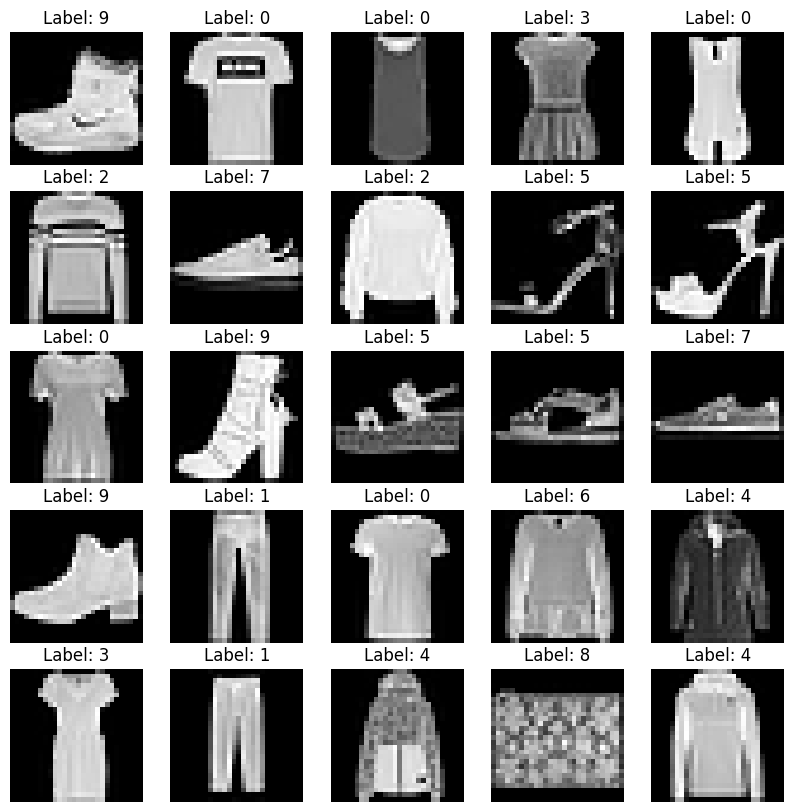

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of classes: 10


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# Check the shape of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")


The Fashion MNIST (fMNIST) dataset consists of 28x28 grayscale images of 10 fashion categories.

The training set contains 60,000 examples, and the test set contains 10,000 examples.

Each image is associated with a label from 0 to 9, representing a specific fashion category.

In [19]:
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Flatten the images
train_images_flat = train_images.reshape((60000, 28 * 28))
test_images_flat = test_images.reshape((10000, 28 * 28))

# Normalize pixel values to be between 0 and 1
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images_flat.astype('float32') / 255

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

def build_model(optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Configuration 1
model1 = build_model()
history1 = model1.fit(train_images_flat, train_labels_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Configuration 2
model2 = build_model(optimizer=optimizers.RMSprop(learning_rate=0.01))
history2 = model2.fit(train_images_flat, train_labels_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Configuration 3
model3 = build_model(optimizer=optimizers.Adam(learning_rate=0.001))
history3 = model3.fit(train_images_flat, train_labels_one_hot, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.6012 - accuracy: 0.7897 - val_loss: 0.4320 - val_accuracy: 0.8457
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4402 - accuracy: 0.8436 - val_loss: 0.4022 - val_accuracy: 0.8547
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4002 - accuracy: 0.8555 - val_loss: 0.3685 - val_accuracy: 0.8691
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3766 - accuracy: 0.8644 - val_loss: 0.3540 - val_accuracy: 0.8757
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3622 - accuracy: 0.8694 - val_loss: 0.3440 - val_accuracy: 0.8767
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3484 - accuracy: 0.8720 - val_loss: 0.3312 - val_accuracy: 0.8813
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3388 - accuracy: 0.8756 - val_loss: 0.3312 - val_accuracy: 0.8788
Epoch 

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.8788


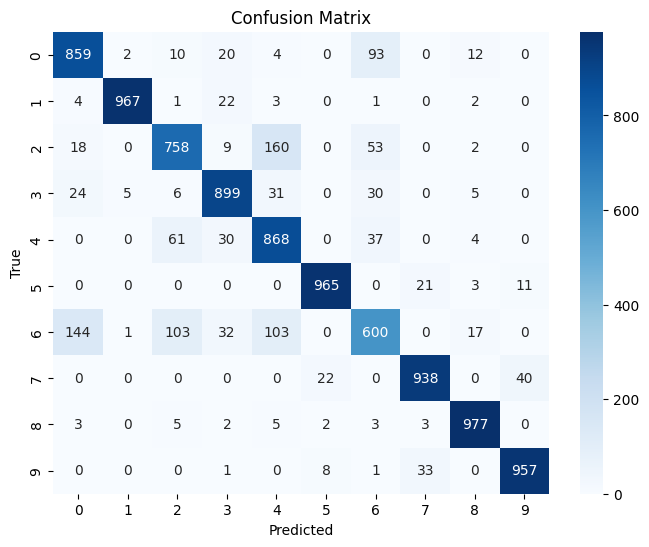

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.8404


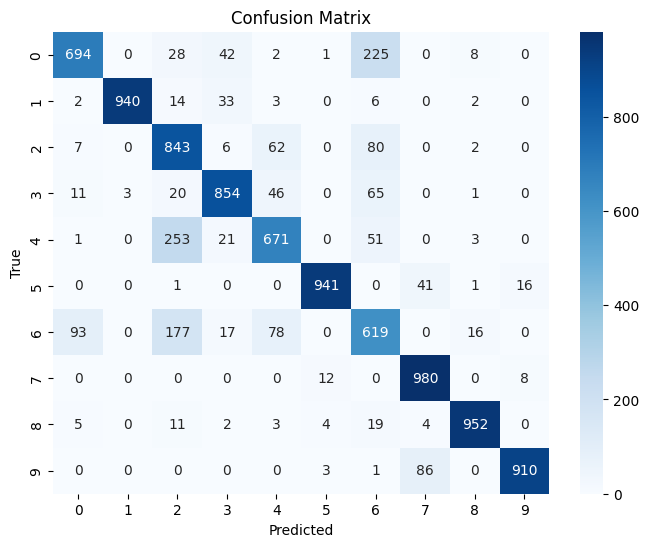

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.8741


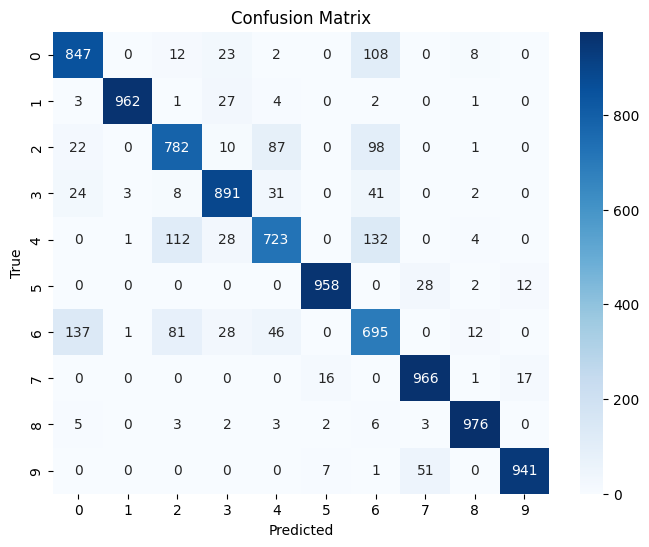

In [20]:
# Function to evaluate model and display results
def evaluate_model(model, test_data, test_labels):
    # Predictions
    predictions = model.predict(test_data)
    predicted_labels = np.argmax(predictions, axis=1)

    # Accuracy
    accuracy = accuracy_score(test_labels, predicted_labels)
    print(f"Accuracy: {accuracy}")

    # Confusion Matrix
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate for Configuration 1
evaluate_model(model1, test_images_flat, test_labels)

# Evaluate for Configuration 2
evaluate_model(model2, test_images_flat, test_labels)

# Evaluate for Configuration 3
evaluate_model(model3, test_images_flat, test_labels)


313/313 [==============================] - 0s 1ms/step
Accuracy: 0.8788


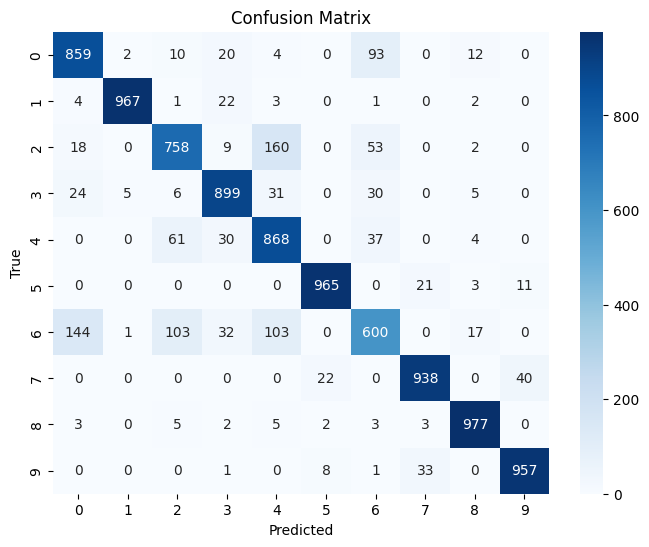

In [22]:
# Choose the best model (e.g., Configuration 2)
best_model = model1

# Report Metrics for the Best Configuration
evaluate_model(best_model, test_images_flat, test_labels)


The confusion matrix in fMNIST shows model predictions by class. 

Rows denote true classes, columns represent predicted classes. 

Diagonal elements are correct classifications (true positives), off-diagonal are misclassifications.

Class 0, 2 and 4 were misclassified as Class 6 most of the time.

Class 4 was also misclassified majorly as Class 2.

Class 6 was misclassified most of the time as Class 0.

The fMNIST exploration indicates frequent misclassifications between classes 0, 2, 4, and 6, 

revealing challenges in discriminating visually similar fashion categories. 

Class 4 often confuses with Class 2, while Class 6 tends to be misclassified as Class 0. 

This suggests a need for model refinement through adjustments in architecture, hyperparameters, or data augmentation. 

The iterative process should focus on resolving specific misclassification patterns for enhanced accuracy and robustness.